# Regression Analysis


The following code is for Regression Analysis and predicting the score finally. The parameters considered for scoring are 
Indegree Centrality , Outdegree Centrality, Pagerank Score, Payment words, Session words

R-squared score (training)(Linear regression): 0.474
R-squared score (testing)(Linear Regression): 0.353
Number of non-zero features: 6
linear regression linear model intercept: 0.9727896992987417
linear regression linear model coeff:
[-1.51975713  1.19948897  5.33328875  4.02460338  1.18104906  1.80164851]
lasso regression linear model intercept: 2.3908629441624365
lasso regression linear model coeff:
[ 0.  0.  0.  0.  0.  0.]
Non-zero features: 0
R-squared score (training): 0.000
R-squared score (test): -0.017

Features with non-zero weight (sorted by absolute magnitude):


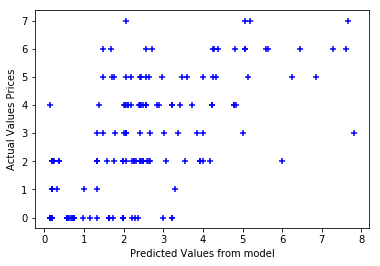

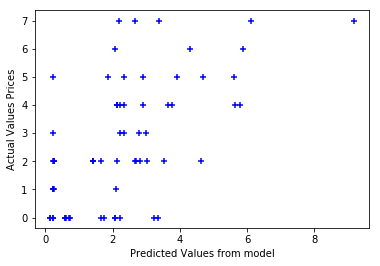

In [6]:
import pandas as pd
from sklearn import datasets

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
import statsmodels.api as sm

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


reg = linear_model.LinearRegression()
dfs = pd.read_excel('FinalData.xlsx', sheet_name=0)
features = dfs.loc[dfs['Indegree Centrality']>=0,['Indegree Centrality','Outdegree Centrality','PageRank Score','Payment words:','Session words:','Method:']].values
value = list(dfs['Fscore'].values)

X_train, X_test, y_train, y_test = train_test_split(features, value,
                                                   random_state = 0)


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Features_scaled = scaler.fit_transform(features)
linlasso = Lasso(alpha=8, max_iter = 1000).fit(X_train_scaled, y_train)

reg.fit(Features_scaled, value)
linridge = Ridge(alpha=0).fit(X_train_scaled, y_train)
print('R-squared score (training)(Linear regression): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (testing)(Linear Regression): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))
print('linear regression linear model intercept: {}'
     .format(linridge.intercept_))
print('linear regression linear model coeff:\n{}'
     .format(linridge.coef_))

print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

model = sm.OLS(y_train, X_train).fit() 
predictions = model.predict(X_train)

model1 = sm.OLS(y_test,X_test).fit()
predictions1 = model1.predict(X_test)

plt.scatter(predictions, y_train, s=35, c='b', marker='+', zorder=15)
plt.xlabel("Predicted Values from model")
plt.ylabel("Actual Values Prices")
plt.show()

plt.scatter(predictions1, y_test, s=35, c='b', marker='+', zorder=15)
plt.xlabel("Predicted Values from model")
plt.ylabel("Actual Values Prices")
plt.show()

for e in sorted (list(zip(list(features), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))


Trying different regression techniques and comparing the r-squared value

In [5]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(Features_scaled, value)  
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled,y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}'
         .format(this_alpha, num_coeff_bigger, r2_train))
    print('Alpha = {:.2f}\nnum abs(coeff)>1.0:{},\
    r-squared testing: {:.3f}'.format(this_alpha,num_coeff_bigger,r2_test))

linreg = reg.fit(Features_scaled,value) 
r1_train = linreg.score(X_train_scaled,y_train)
r1_test = linreg.score(X_test_scaled,y_test)
print('r-squared:(Train) {:.3f}'.format(r1_train))
print('r-squared:(Test) {:.3f}'.format(r1_test))     

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 5, r-squared training: 0.47
Alpha = 0.00
num abs(coeff)>1.0:5,    r-squared testing: 0.366
Alpha = 1.00
num abs(coeff) > 1.0: 4, r-squared training: 0.46
Alpha = 1.00
num abs(coeff)>1.0:4,    r-squared testing: 0.355
Alpha = 10.00
num abs(coeff) > 1.0: 3, r-squared training: 0.38
Alpha = 10.00
num abs(coeff)>1.0:3,    r-squared testing: 0.294
Alpha = 20.00
num abs(coeff) > 1.0: 2, r-squared training: 0.33
Alpha = 20.00
num abs(coeff)>1.0:2,    r-squared testing: 0.257
Alpha = 50.00
num abs(coeff) > 1.0: 0, r-squared training: 0.23
Alpha = 50.00
num abs(coeff)>1.0:0,    r-squared testing: 0.183
Alpha = 100.00
num abs(coeff) > 1.0: 0, r-squared training: 0.16
Alpha = 100.00
num abs(coeff)>1.0:0,    r-squared testing: 0.121
Alpha = 1000.00
num abs(coeff) > 1.0: 0, r-squared training: 0.02
Alpha = 1000.00
num abs(coeff)>1.0:0,    r-squared testing: 0.009
r-squared:(Train) 0.471
r-squared:(Test) 0